In [46]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,silhouette_score
from gensim import corpora, models, similarities
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from nltk.cluster import KMeansClusterer
import nltk
ps = PorterStemmer()

In [6]:
df = pd.read_csv('planecrashlatest.csv')

In [7]:
df.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,c 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [8]:
text_data = df['summary'].dropna()
text_data = pd.DataFrame(text_data)

In [9]:
documents = list(text_data['summary'])
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [10]:
true_k = 4
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('Cluster %d:' % i)
    for ind in order_centroids[i, :10]:
        print ('%s' % terms[ind]),
    print

Most Common Terms per Cluster:
Cluster 0:
shot
rebels
missile
surface
air
forces
aircraft
british
enemy
anti
Cluster 1:
en
route
crashed
mountain
disappeared
plane
cargo
weather
flight
conditions
Cluster 2:
crashed
plane
aircraft
engine
taking
takeoff
flight
mountain
pilot
failure
Cluster 3:
approach
runway
crashed
attempting
land
short
landing
plane
aircraft
fog


In [12]:
vectorizer=CountVectorizer(stop_words='english')
data_corpus=list(text_data['summary'])
vocabulary=vectorizer.fit(data_corpus)
X= vectorizer.transform(data_corpus)

In [13]:
true_k = 6
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(X)
y_kmeans = model.predict(X)

In [14]:
print ('Most Common Terms per Cluster:')
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print('Cluster %d:' % i)
    for ind in order_centroids[i, :10]:
        print ('%s' % terms[ind]),
    print

Most Common Terms per Cluster:
Cluster 0:
runway
aircraft
plane
landing
crew
approach
airport
pilot
accident
feet
Cluster 1:
crashed
plane
aircraft
pilot
flight
mountain
taking
engine
weather
route
Cluster 2:
approach
aircraft
runway
crashed
crew
pilot
plane
landing
flight
short
Cluster 3:
airplane
box
canyon
lake
pilot
terrain
blind
equipped
float
accident
Cluster 4:
aircraft
plane
pilot
flight
crashed
engine
failure
control
crew
loss
Cluster 5:
flight
runway
trainee
captain
00
tower
takeoff
crew
instructor
approach


In [16]:
tweet = df.summary
tweet=list(tweet)

In [29]:
corpus=[]
for i in range(len(tweet)):
    temp=[]
    if type(tweet[i])!=float:
        for j in tweet[i].split(' '):
            try:
                tem1=int(j)
            except:
                try:
                    if j not in stopwords.words('english'):
                        j= ps.stem(j)
                        temp.append(j.lower())
                except:
                    temp.append(j.lower())
        corpus.append(temp)

In [30]:
for i in range(len(corpus)):
    temp=[]
    for j in range(len(corpus[i])):
        try:
            temp.append(corpus[i][j].decode('utf-8'))
        except:
            temp.append(corpus[i][j])
    corpus[i]=temp

In [32]:
model = Word2Vec(corpus, size=2, window=5, min_count=1, workers=4)

In [33]:
points=model[model.wv.vocab]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
XX=pd.DataFrame(data=points , index=model.wv.vocab , columns=['x','y'])

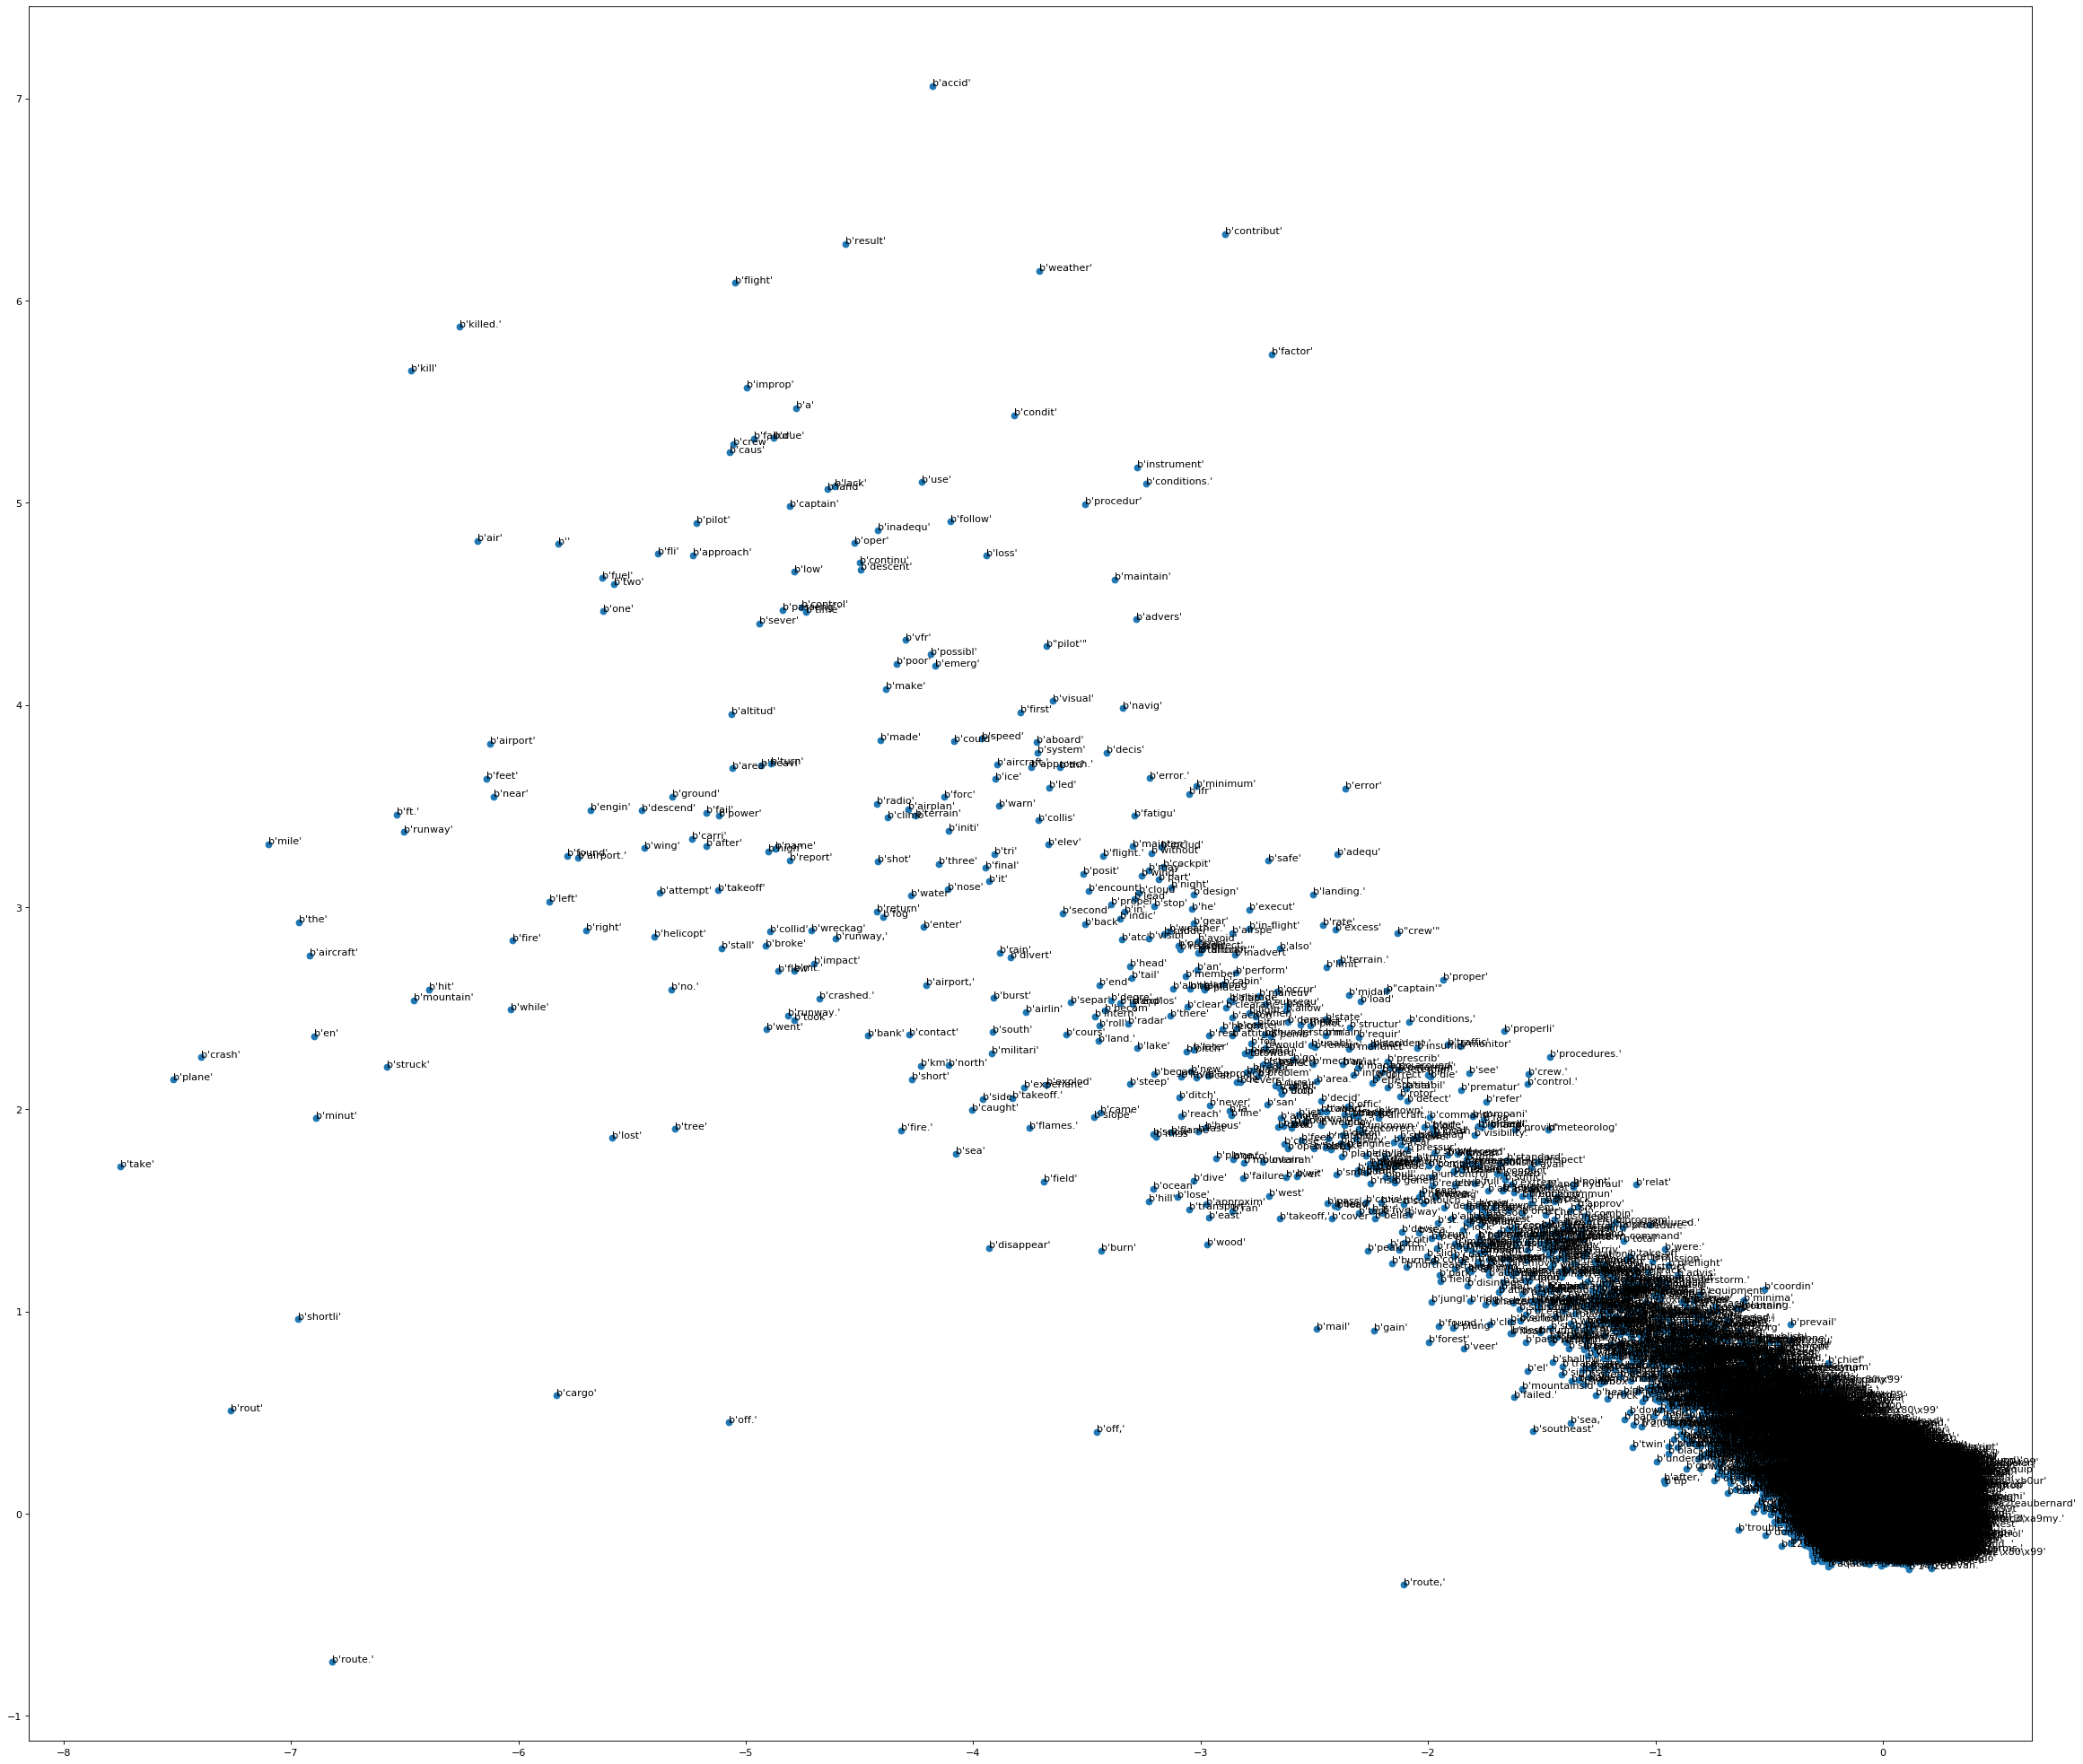

In [36]:
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(XX['x'], XX['y'])
for word, pos in XX.iterrows():
    try:
        ax.annotate(word.encode('utf-8'), pos)
    except:
        kk=0

In [38]:
true_k = 6
model = KMeans(n_clusters=true_k, max_iter=100, n_init=1)
model.fit(XX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=6, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(points, assign_clusters=True)
print (assigned_clusters)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 

In [42]:
col=[]
for i in assigned_clusters:
    if i==0:
        col.append('red')
    if i==1:
        col.append('blue')
    if i==2:
        col.append('green')

[[0.00000000e+00 3.42173053e+00 5.85000951e+00 1.78798833e+00
  6.74774890e-01 2.92665245e-01]
 [3.42173053e+00 0.00000000e+00 2.43134793e+00 1.63427278e+00
  2.74697524e+00 3.71260307e+00]
 [6.74774890e-01 2.74697524e+00 5.17567870e+00 1.11326770e+00
  0.00000000e+00 9.66238128e-01]
 [5.85000951e+00 2.43134793e+00 0.00000000e+00 4.06452757e+00
  5.17567870e+00 6.13984240e+00]
 [1.78798833e+00 1.63427278e+00 4.06452757e+00 4.21468485e-08
  1.11326770e+00 2.07943329e+00]
 [2.92665245e-01 3.71260307e+00 6.13984240e+00 2.07943329e+00
  9.66238128e-01 0.00000000e+00]]


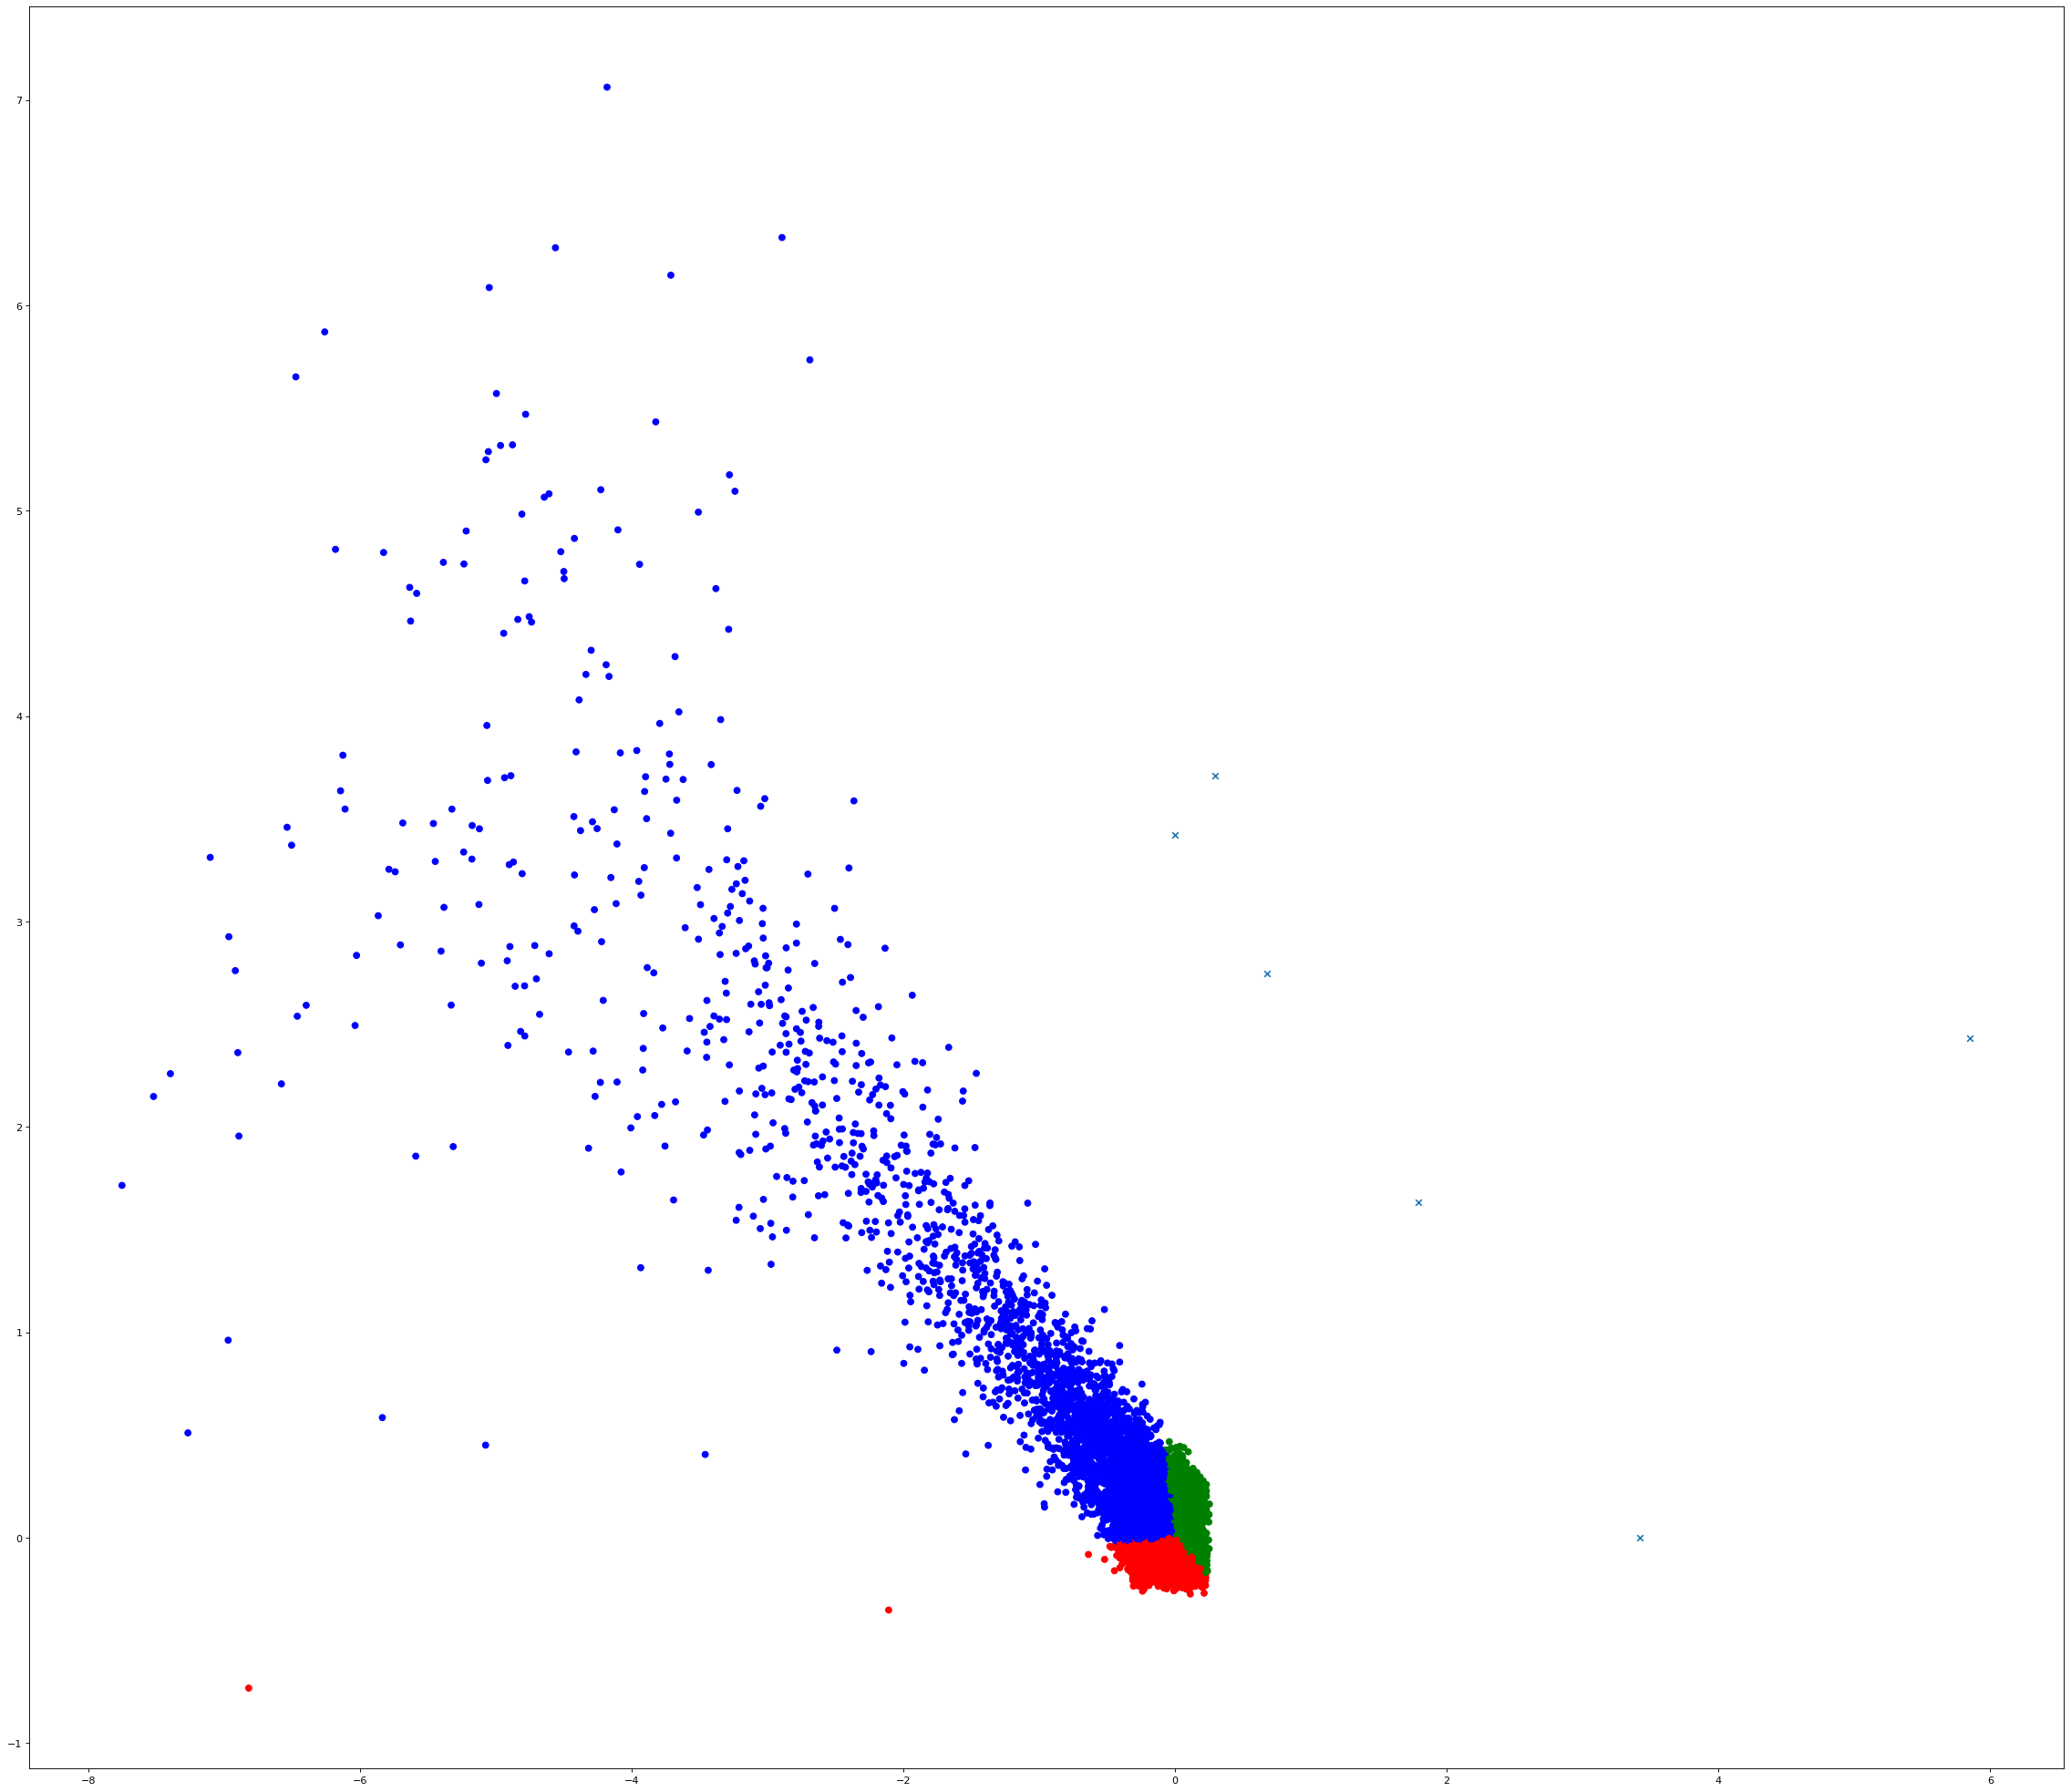

In [43]:
clf = KMeans(n_clusters=6)
data = clf.fit(XX)
centroids = clf.cluster_centers_
transformed_centroids = model.fit_transform(centroids)
print (transformed_centroids)
fig=plt.figure(figsize=(36, 32), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
ax.scatter(XX['x'], XX['y'],c=col)
ax.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')

In [47]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
silhouette_score = silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[2 0 0 ... 0 0 0]
Centroids data
[[0.00059014 0.02567129 0.         ... 0.00088522 0.         0.        ]
 [0.00524476 0.10839161 0.         ... 0.0034965  0.00174825 0.        ]
 [0.00118064 0.06729634 0.00059032 ... 0.00118064 0.         0.00059032]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-120733.24716590864
Silhouette_score: 
0.06544989267698513
